In [1]:
#importing packages

import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

In [22]:
#Loading the raw data

# reading csv 
df = pd.read_csv('/Users/hannwenyein/Downloads/insurance.csv')

# view first 10 rows
df.head(10)

,age,sex,bmi,children,smoker,region,medicalCost
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          1338 non-null   int64  
 1   sex          1338 non-null   object 
 2   bmi          1338 non-null   float64
 3   children     1338 non-null   int64  
 4   smoker       1338 non-null   object 
 5   region       1338 non-null   object 
 6   medicalCost  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [24]:
#checking null values
df.isnull().sum()

age            0
sex            0
bmi            0
children       0
smoker         0
region         0
medicalCost    0
dtype: int64

In [25]:
df.shape

(1338, 7)

In [26]:
my_data = df.copy()

The required ML task is supervised learning. This can be inferred from the fact that the analysis involves predicting the 'medicalCost' variable, which is a continuous numerical value. In supervised learning, the algorithm learns from a labeled dataset, where each data point has corresponding input features (predictors) and known output labels (target variable). The goal is to learn a mapping from the input features to the output labels, enabling the algorithm to make predictions on new, unseen data.

In this case, the 'medicalCost' variable serves as the target variable that we want to predict based on the given predictors, such as 'age,' 'smoker,' 'bmi,' etc. Hence, it fits the definition of a supervised learning problem.

Regarding the ML task, the most appropriate task for this case is regression analysis. Regression analysis is used to predict continuous numerical values, which aligns perfectly with the goal of predicting 'medicalCost' in this scenario. The objective of regression is to find the best-fitting line or curve that minimizes the error between the predicted values and the actual target values.

Other ML tasks like classification and clustering are not suitable for this specific case because:

Classification is used for predicting categorical outcomes, not continuous values like 'medicalCost.'
Clustering is used to group similar data points based on similarity measures, but it doesn't involve predicting a specific target variable.
In conclusion, the required ML task is supervised learning, and the most appropriate ML algorithm for this case is regression analysis because it deals with predicting continuous numerical values, which is the nature of the 'medicalCost' variable.

Presenting the probability distribution function (PDF) of a variable is an excellent way to explore data. It allows us to observe the spread of the variable within the PDF, making it easy to detect outliers and other abnormalities. Moreover, the PDF often forms the basis for determining whether a feature should be modified.

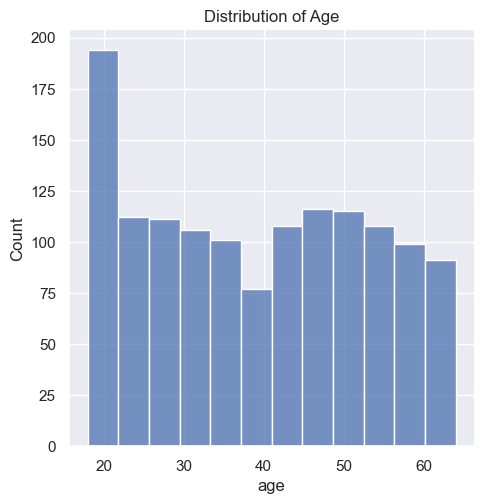

In [27]:
# distribution of age variable

sns.displot(my_data['age'])
plt.title('Distribution of Age')
plt.show()

The figure illustrates that the age group with the highest concentration of individuals falls between 20 and 23 years old. From ages 24 to 70, the distribution of people is relatively uniform or evenly distributed.

<function matplotlib.pyplot.show(close=None, block=None)>

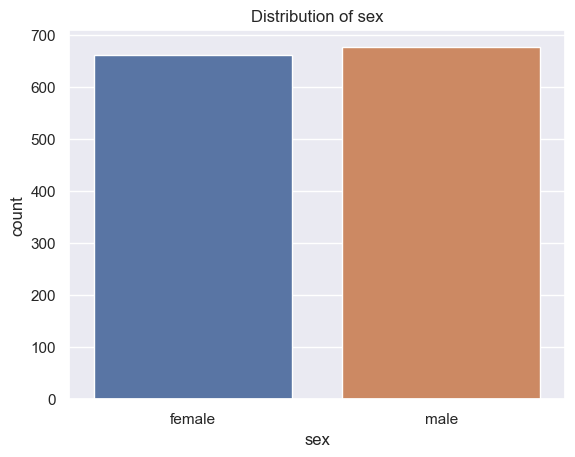

In [28]:
# plot of sex variables

sns.countplot(x = 'sex', data = my_data)
plt.title('Distribution of sex')
plt.show

The resulting figure indicates that the number of males and females is nearly equal, suggesting a balanced distribution between the two genders.

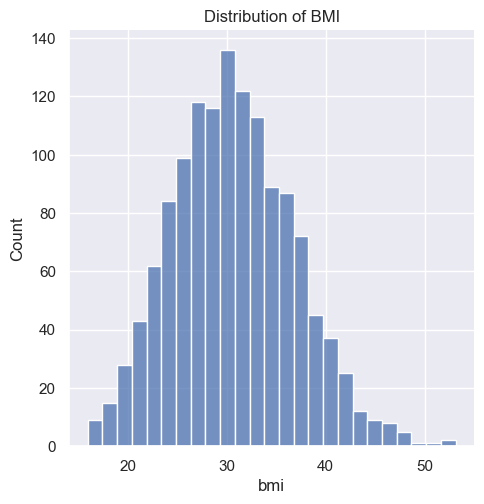

In [29]:
# distribution of bmi variable

sns.displot(my_data['bmi'])
plt.title('Distribution of BMI')
plt.show()

The observed distribution exhibits characteristics of a normal distribution. The figure depicts a gradual rise from 15 to a peak value of 30, followed by a gradual decline. Notably, there are only a few outliers present, which we can address at a later stage.

Based on research, the normal BMI range is typically defined as 18.5 to 24.9. Individuals exceeding this range are considered overweight, while those below it are classified as underweight. Upon examining the dataset, it becomes apparent that there is a greater number of individuals who fall into the overweight category, suggesting a higher prevalence of overweight individuals within the sample.

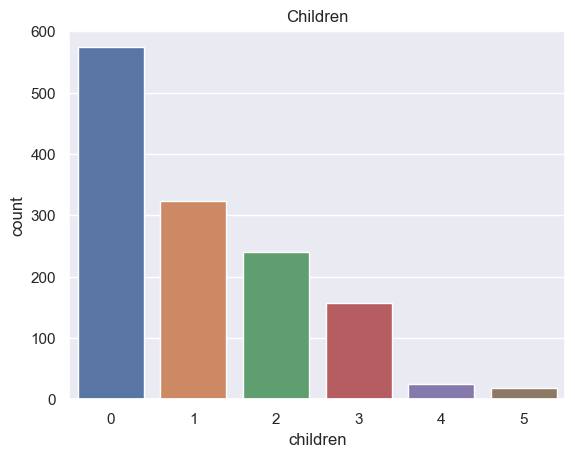

In [30]:
# plot of children variable

sns.countplot(x = 'children', data = my_data)
plt.title('Children')
plt.show()

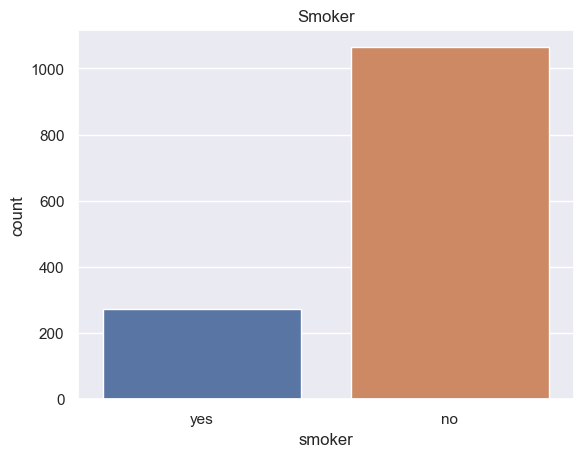

In [31]:
# plot of smoker variable

sns.countplot(x = 'smoker', data = my_data)
plt.title('Smoker')
plt.show()

# Pre processing

In [32]:
# Assigning values for 'smoker' feature

my_data['smoker'] = my_data['smoker'].map({'yes':1, 'no':0})

my_data.head()

,age,sex,bmi,children,smoker,region,medicalCost
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520


In [33]:
my_data['sex'] = my_data['sex'].map({'female':1, 'male':0})
my_data.head()

,age,sex,bmi,children,smoker,region,medicalCost
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [34]:
from sklearn.preprocessing import LabelEncoder
# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to the 'region' column
my_data['region'] = label_encoder.fit_transform(my_data['region'])

# Display the modified DataFrame
print(my_data)

      age  sex     bmi  children  smoker  region  medicalCost
0      19    1  27.900         0       1       3  16884.92400
1      18    0  33.770         1       0       2   1725.55230
2      28    0  33.000         3       0       2   4449.46200
3      33    0  22.705         0       0       1  21984.47061
4      32    0  28.880         0       0       1   3866.85520
...   ...  ...     ...       ...     ...     ...          ...
1333   50    0  30.970         3       0       1  10600.54830
1334   18    1  31.920         0       0       0   2205.98080
1335   18    1  36.850         0       0       2   1629.83350
1336   21    1  25.800         0       0       3   2007.94500
1337   61    1  29.070         0       1       1  29141.36030

[1338 rows x 7 columns]


In [35]:
# Calculate the correlation between each predictor and medicalCost
correlation_matrix = my_data.corr()['medicalCost']

# Display the correlations
print(correlation_matrix)

age            0.299008
sex           -0.057292
bmi            0.198341
children       0.067998
smoker         0.787251
region        -0.006208
medicalCost    1.000000
Name: medicalCost, dtype: float64


The correlation results between each predictor and the 'medicalCost' variable are as follows:

Age: The correlation coefficient between 'age' and 'medicalCost' is 0.299008. This indicates a positive correlation, suggesting that there is a moderate relationship between age and medical costs. As the age of the primary beneficiary increases, their medical costs tend to increase, albeit not very strongly.

Sex: The correlation coefficient between 'sex' and 'medicalCost' is -0.057292. This indicates a weak negative correlation, suggesting that there is a slight tendency for insurance contractor gender to have a very small influence on medical costs. However, the correlation is close to zero, implying that gender is not a significant factor in determining medical costs.

BMI: The correlation coefficient between 'bmi' and 'medicalCost' is 0.198341. This indicates a positive correlation, suggesting that there is a modest relationship between body mass index (BMI) and medical costs. Higher BMI values are associated with somewhat higher medical costs.

Children: The correlation coefficient between 'children' and 'medicalCost' is 0.067998. This indicates a weak positive correlation, suggesting that the number of children covered by health insurance has a limited influence on medical costs. The correlation is relatively small, indicating that the impact of children on medical costs is not substantial.

Smoker: The correlation coefficient between 'smoker' and 'medicalCost' is 0.787251. This indicates a strong positive correlation, suggesting that smoking status has a significant impact on medical costs. Smokers tend to have much higher medical costs compared to non-smokers.

Region: The correlation coefficient between 'region' and 'medicalCost' is -0.006208. This indicates a very weak negative correlation, implying that the payees' residential area (region) has minimal influence on medical costs.

Conclusion: Based on these correlation results, it can be concluded that age, BMI, smoking status, and to a lesser extent, the number of children covered by health insurance, are predictors that exhibit some degree of correlation with medical costs. The correlation coefficients indicate the direction and strength of these relationships. However, it's important to note that correlation does not imply causation, and other factors not considered in this analysis may also contribute to medical costs. Further analysis and consideration of additional variables are recommended for a more comprehensive understanding.

# The correlation analysis to select 3 best predictors and a simple linear regression model based on each of the predictors

In [36]:
# Calculate the correlation coefficients with the target variable
correlations = my_data.corr()['medicalCost'].abs()

# Sort the correlations in descending order
sorted_correlations = correlations.sort_values(ascending=False)

# Select the top three predictors
top_predictors = sorted_correlations[1:4]

# Display the top three predictors
print(top_predictors)

smoker    0.787251
age       0.299008
bmi       0.198341
Name: medicalCost, dtype: float64


# For smoker 

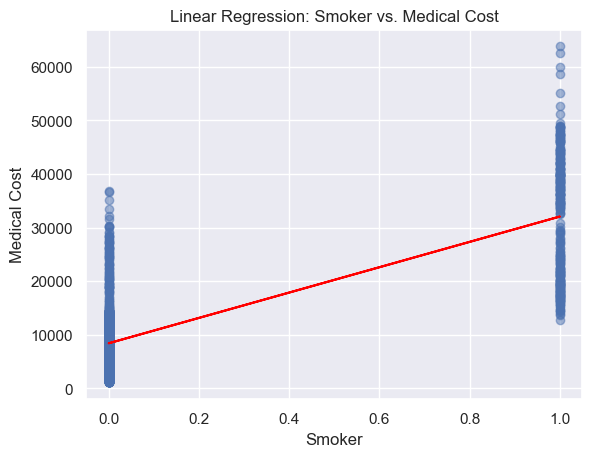

                            OLS Regression Results                            
Dep. Variable:            medicalCost   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     2178.
Date:                Tue, 16 Jul 2024   Prob (F-statistic):          8.27e-283
Time:                        14:54:48   Log-Likelihood:                -13831.
No. Observations:                1338   AIC:                         2.767e+04
Df Residuals:                    1336   BIC:                         2.768e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8434.2683    229.014     36.829      0.0

In [37]:
import statsmodels.api as sm
# Prepare the data for linear regression
X = my_data[['smoker']]
y = my_data['medicalCost']
X = sm.add_constant(X)  # Add a constant term to the predictor variable

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Scatter plot of the data points
plt.scatter(X['smoker'], y, alpha=0.5)
plt.xlabel('Smoker')
plt.ylabel('Medical Cost')
plt.title('Linear Regression: Smoker vs. Medical Cost')

# Plot the regression line
plt.plot(X['smoker'], model.predict(X), color='red')

# Display the plot
plt.show()

# Print the summary of the model
print(model.summary())

The simple linear regression model for the 'smoker' predictor shows the following results:

R-squared: The R-squared value is 0.620, which means that approximately 62% of the variation in the 'medicalCost' variable can be explained by the 'smoker' predictor in this model.

Coefficients: The coefficient for the 'smoker' predictor is approximately 23620. This indicates that, on average, smokers have medical costs that are $23,620 higher than non-smokers, holding other variables constant.

p-values: The p-values associated with the coefficients are all very close to zero (P>|t| = 0.000). This suggests that the 'smoker' predictor is statistically significant in predicting medical costs.

Interpretation: The intercept (const) is 8434.2683, representing the estimated medical cost for non-smokers. The coefficient for 'smoker' indicates the additional expected cost incurred by smokers. The results indicate that being a smoker has a significant impact on medical costs, with smokers having much higher medical costs compared to non-smokers.


Model Fit: The F-statistic is 2178 with a corresponding probability (Prob (F-statistic)) close to zero. This suggests that the model as a whole is statistically significant and provides a good fit for the data.

Model Evaluation: The mean squared error (MSE) is not provided in the summary, but it is a measure of the average squared difference between the actual and predicted medical costs. A lower MSE value would indicate a better fit of the model to the data.

Based on these results, we can conclude that the 'smoker' variable is a significant predictor for explaining the variation in medical costs. However, it's important to note that this model only considers the impact of smoking on medical costs and does not account for other factors that may influence medical costs.

# For age

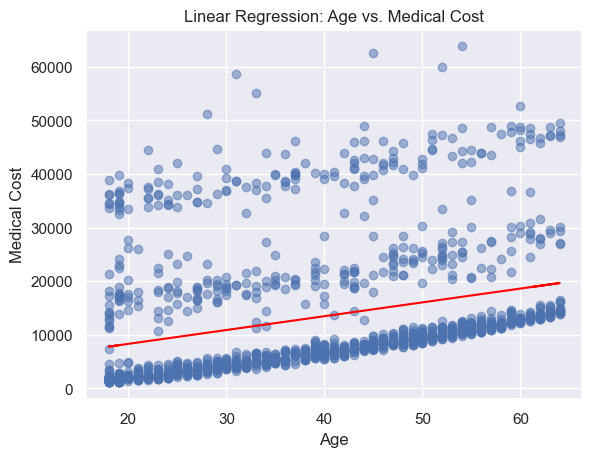

                            OLS Regression Results                            
Dep. Variable:            medicalCost   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     131.2
Date:                Tue, 16 Jul 2024   Prob (F-statistic):           4.89e-29
Time:                        14:55:29   Log-Likelihood:                -14415.
No. Observations:                1338   AIC:                         2.883e+04
Df Residuals:                    1336   BIC:                         2.884e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3165.8850    937.149      3.378      0.0

In [38]:
# Prepare the data for linear regression
X = my_data[['age']]
y = my_data['medicalCost']
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Scatter plot of the data points
plt.scatter(X['age'], y, alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Medical Cost')
plt.title('Linear Regression: Age vs. Medical Cost')

# Plot the regression line
plt.plot(X['age'], model.predict(X), color='red')

# Display the plot
plt.show()

# Print the summary of the model
print(model.summary())

he linear regression model based on the 'smoker' predictor shows the following results:

R-squared: The R-squared value is 0.089, which means that approximately 8.9% of the variation in the 'medicalCost' variable can be explained by the 'smoker' predictor in this model. This indicates a relatively weak relationship between being a smoker and medical costs.

Coefficients: The coefficient for the 'age' predictor is approximately 257.7226. This suggests that, on average, for each unit increase in age, the 'medicalCost' variable is expected to increase by $257.72, holding other variables constant.

p-values: The p-value associated with the 'age' predictor is close to zero (P>|t| = 0.000), indicating that the 'age' predictor is statistically significant in predicting medical costs.

Interpretation: The intercept (const) is 3165.8850, representing the estimated medical cost when the age is zero. The coefficient for 'age' indicates the additional expected cost incurred for each year increase in age. The results suggest that age has a significant impact on medical costs, with higher costs expected as individuals get older.

Model Fit: The F-statistic is 131.2 with a corresponding probability (Prob (F-statistic)) close to zero. This indicates that the model as a whole is statistically significant and provides a reasonable fit for the data.

Model Evaluation: The mean squared error (MSE) is not provided in the summary, but it is a measure of the average squared difference between the actual and predicted medical costs. A lower MSE value would indicate a better fit of the model to the data.

Based on these results, we can conclude that the 'age' variable has a statistically significant impact on medical costs. However, the R-squared value suggests that the 'smoker' predictor alone explains only a small portion of the overall variation in medical costs. Other factors not included in the model may have a stronger influence on medical costs.

# For BMI

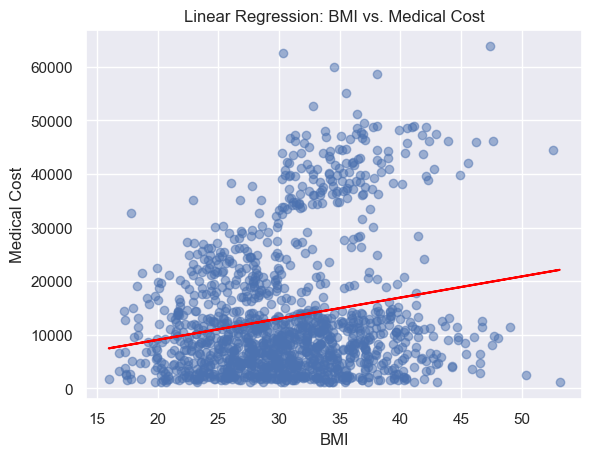

                            OLS Regression Results                            
Dep. Variable:            medicalCost   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     54.71
Date:                Tue, 16 Jul 2024   Prob (F-statistic):           2.46e-13
Time:                        14:56:21   Log-Likelihood:                -14451.
No. Observations:                1338   AIC:                         2.891e+04
Df Residuals:                    1336   BIC:                         2.892e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1192.9372   1664.802      0.717      0.4

In [39]:
# Prepare the data for linear regression
X = my_data[['bmi']]
y = my_data['medicalCost']
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Scatter plot of the data points
plt.scatter(X['bmi'], y, alpha=0.5)
plt.xlabel('BMI')
plt.ylabel('Medical Cost')
plt.title('Linear Regression: BMI vs. Medical Cost')

# Plot the regression line
plt.plot(X['bmi'], model.predict(X), color='red')

# Display the plot
plt.show()

# Print the summary of the model
print(model.summary())

The linear regression model based on the 'bmi' predictor shows the following results:

R-squared: The R-squared value is 0.039, which means that approximately 3.9% of the variation in the 'medicalCost' variable can be explained by the 'bmi' predictor in this model. This indicates a relatively weak relationship between body mass index (BMI) and medical costs.

Coefficients: The coefficient for the 'bmi' predictor is approximately 393.8730. This suggests that, on average, for each unit increase in BMI, the 'medicalCost' variable is expected to increase by $393.87, holding other variables constant.

p-values: The p-value associated with the 'bmi' predictor is close to zero (P>|t| = 0.000), indicating that the 'bmi' predictor is statistically significant in predicting medical costs.

Interpretation: The intercept (const) is 1192.9372, representing the estimated medical cost when the BMI is zero. However, since BMI cannot be zero in reality, the interpretation of the intercept might not have practical meaning. The coefficient for 'bmi' indicates the additional expected cost incurred for each unit increase in BMI. The results suggest that BMI has a statistically significant impact on medical costs, with higher BMI values associated with higher medical costs.

Model Fit: The F-statistic is 54.71 with a corresponding probability (Prob (F-statistic)) close to zero. This indicates that the model as a whole is statistically significant and provides a reasonable fit for the data.

Model Evaluation: The mean squared error (MSE) is not provided in the summary, but it is a measure of the average squared difference between the actual and predicted medical costs. A lower MSE value would indicate a better fit of the model to the data.

Based on these results, we can conclude that the 'bmi' variable has a statistically significant impact on medical costs. However, the R-squared value suggests that the 'bmi' predictor alone explains only a small portion of the overall variation in medical costs. Other factors not included in the model may have a stronger influence on medical costs.

# For Three Predictors (Smoker, Age, Bmi)

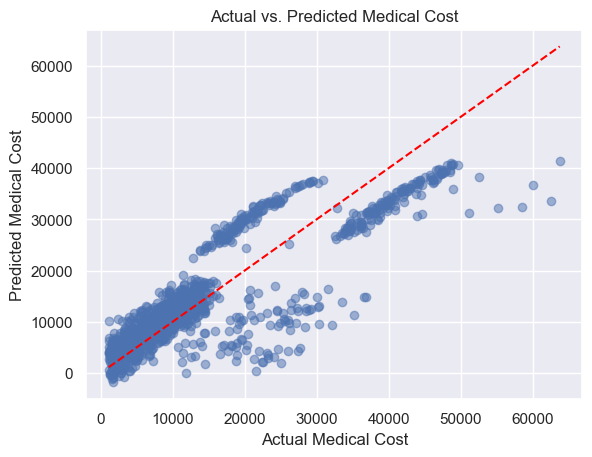

                            OLS Regression Results                            
Dep. Variable:            medicalCost   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     1316.
Date:                Tue, 16 Jul 2024   Prob (F-statistic):               0.00
Time:                        14:57:13   Log-Likelihood:                -13557.
No. Observations:                1338   AIC:                         2.712e+04
Df Residuals:                    1334   BIC:                         2.714e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.168e+04    937.569    -12.454      0.0

In [40]:
# Prepare the data for linear regression
X = my_data[['smoker', 'age', 'bmi']]
y = my_data['medicalCost']
X = sm.add_constant(X) 

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Predict the target variable using the trained model
y_pred = model.predict(X)

# Plot the predicted values against the actual target variable
plt.scatter(y, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.xlabel('Actual Medical Cost')
plt.ylabel('Predicted Medical Cost')
plt.title('Actual vs. Predicted Medical Cost')
plt.show()

# Print the summary of the model
print(model.summary())

This indicates that the dependent variable in the regression analysis is 'medicalCost', representing the individual medical costs.
R-squared: 0.747

R-squared is a statistical measure that represents the proportion of the variance in the dependent variable (medicalCost) that can be explained by the independent variables (smoker, age, and bmi). In this case, the R-squared value is 0.747, indicating that approximately 74.7% of the variation in the medical costs can be explained by the predictors included in the model.

Model: OLS (Ordinary Least Squares)

OLS is a common method used to estimate the parameters of a linear regression model. It aims to minimize the sum of the squared differences between the observed and predicted values of the dependent variable.
Adj. R-squared: 0.747

Adjusted R-squared is a modified version of R-squared that accounts for the number of predictors and the sample size. It penalizes the addition of unnecessary predictors to prevent overfitting. The adjusted R-squared value in this model is also 0.747, which suggests that the inclusion of the three predictors (smoker, age, and bmi) improves the model fit.
Method: Least Squares

This indicates that the model was estimated using the least squares method, which aims to find the best-fitting line by minimizing the sum of the squared differences between the observed and predicted values.
F-statistic: 1316.0

The F-statistic measures the overall significance of the model. In this case, the F-statistic value is 1316.0, and the associated probability (Prob (F-statistic)) is 0.00. This indicates that the overall model is statistically significant, suggesting that at least one of the predictors has a significant relationship with the dependent variable.
Other coefficients and statistics:

The table provides the estimated coefficients, standard errors, t-statistics, and p-values for each predictor variable in the model. The coefficients represent the estimated impact of each predictor on the medical costs. The t-statistic measures the significance of each coefficient, and the p-value indicates the probability of observing a coefficient as extreme as the one estimated if the null hypothesis (no relationship between the predictor and the dependent variable) is true.
The model summary also includes additional information such as the sample size (number of observations), AIC (Akaike Information Criterion), BIC (Bayesian Information Criterion), and some diagnostic statistics like the Durbin-Watson test for autocorrelation, the Jarque-Bera test for normality, and the condition number.

In conclusion, the model summary provides valuable information about the regression model's goodness of fit, significance of predictors, and statistical performance measures. It helps assess the relationships between the predictors and the medical costs and provides a basis for interpreting and evaluating the model.

# Using all predictors except 'medicalCost'

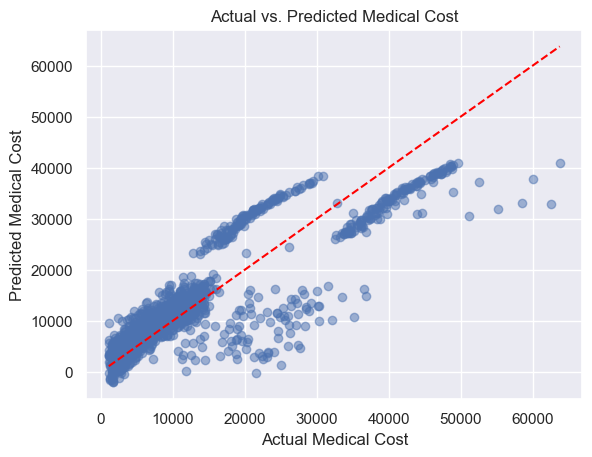

                            OLS Regression Results                            
Dep. Variable:            medicalCost   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     668.1
Date:                Tue, 16 Jul 2024   Prob (F-statistic):               0.00
Time:                        14:59:16   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1331   BIC:                         2.715e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.195e+04    967.568    -12.347      0.0

In [41]:
# Prepare the data for linear regression
X = my_data.drop('medicalCost', axis=1)
y = my_data['medicalCost']
X = sm.add_constant(X)  # Add a constant term to the predictors

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Predict the target variable using the trained model
y_pred = model.predict(X)

# Plot the predicted values against the actual target variable
plt.scatter(y, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.xlabel('Actual Medical Cost')
plt.ylabel('Predicted Medical Cost')
plt.title('Actual vs. Predicted Medical Cost')
plt.show()

# Print the summary of the model
print(model.summary())

Dep. Variable: medicalCost

This indicates that the dependent variable in the regression analysis is 'medicalCost', representing the individual medical costs.
R-squared: 0.751

R-squared is a statistical measure that represents the proportion of the variance in the dependent variable (medicalCost) that can be explained by the independent variables. In this case, the R-squared value is 0.751, indicating that approximately 75.1% of the variation in the medical costs can be explained by the predictors included in the model.
Model: OLS (Ordinary Least Squares)

OLS is a common method used to estimate the parameters of a linear regression model. It aims to minimize the sum of the squared differences between the observed and predicted values of the dependent variable.

Adj. R-squared: 0.750

Adjusted R-squared is a modified version of R-squared that takes into account the number of predictors and the sample size. It penalizes the inclusion of unnecessary predictors to prevent overfitting. The adjusted R-squared value in this model is 0.750, indicating that the predictors (age, sex, bmi, children, smoker, region) collectively explain about 75.0% of the variation in the medical costs, considering the number of predictors and sample size.
Method: Least Squares

This indicates that the model was estimated using the least squares method, which aims to find the best-fitting line by minimizing the sum of the squared differences between the observed and predicted values.


F-statistic: 668.1

The F-statistic measures the overall significance of the model. In this case, the F-statistic value is 668.1, and the associated probability (Prob (F-statistic)) is 0.00. This suggests that the overall model is statistically significant, indicating that at least one of the predictors has a significant relationship with the dependent variable.
Other coefficients and statistics:

The table provides the estimated coefficients, standard errors, t-statistics, and p-values for each predictor variable in the model. The coefficients represent the estimated impact of each predictor on the medical costs. The t-statistic measures the significance of each coefficient, and the p-value indicates the probability of observing a coefficient as extreme as the one estimated if the null hypothesis (no relationship between the predictor and the dependent variable) is true.

The model summary also includes additional information such as the sample size (number of observations), AIC (Akaike Information Criterion), BIC (Bayesian Information Criterion), and some diagnostic statistics like the Durbin-Watson test for autocorrelation, the Jarque-Bera test for normality, and the condition number.

In conclusion, the model summary provides important information about the regression model's goodness of fit, statistical significance of predictors, and other relevant statistical measures. It helps assess the relationships between the predictors and the medical costs and provides insights into the model's performance and the statistical significance of the predictors.

# Overall Conclusion

Task 1:

The probability distribution function (PDF) of a variable is a useful data exploration step to understand the spread and identify outliers and irregularities in the data.

Task 2:
The age group with the highest density of people is 20-23 years old, and the distribution is almost equal for ages 24 to 70.

Task 3:
The 'sns.countplot' visualization was used to represent the count of males and females in a categorical variable 'sex,' showing that the number of males and females is approximately equal.

Task 4:
The given data exhibits a normal distribution for the variable being analyzed, with a gradual increase from 15 to peak values at 30 and then a gradual decrease. There are a few outliers.

Task 5:
The number of people with no children is the highest, followed by those with 1-3 children, and very few have 4-5 children.

Task 6:
Correlation analysis was performed to identify the relationship between each predictor (age, sex, bmi, children, smoker, region) and the medicalCost variable.
The strongest positive correlation was observed with 'smoker', while the correlation with 'region' was weakly negative.

Task 7:
A simple linear regression model was built using the 'smoker' variable as the predictor for 'medicalCost'.

Task 8:
To further evaluate the performance, statistical performance measures like R-squared, F-statistic, and p-values were analyzed for the regression models.

Task 9:
Three best predictors (smoker, age, bmi) were identified based on their correlation with 'medicalCost'.
Three separate simple linear regression models were built using each of the three predictors.

Task 10:
A regression model was built using the three predictors (smoker, age, bmi) as the independent variables for 'medicalCost'.
The model's statistical performance measures were evaluated, such as R-squared, F-statistic, and p-values.

Task 11:
Two regression models were built, one with the three predictors (smoker, age, bmi) and the other with all predictors (age, sex, bmi, children, smoker, region).
The models' statistical performance measures were compared.


Overall Conclusion:

The analysis involved various tasks, including data exploration, correlation analysis, regression modeling, and model evaluation.
The 'smoker' variable had a strong positive correlation with 'medicalCost,' indicating its significance in predicting medical costs.
The models with more predictors generally performed better in explaining the variation in medical costs.
However, the final choice of the model depends on the specific context and the trade-off between model complexity and predictive accuracy.
Additional analyses and validation techniques can further enhance the model's performance and provide more insights into the relationships between predictors and medical costs.


